# Om Mistry

## **How does Educational attainment relate to gun deaths in America and what other factors affect this relationship ?**

Sub-Questions to achieve the above goal:
- Is there a correlation between educational attainment and gun deaths rates in the United States after controlling for other demographic and contextual factors, such as age, gender, race, religion and gun ownership rates ? This could be done using regression analysis to examine the contribution of education while keeping the other factors constant.
- To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ? This could be monitored by using the "intent" column of the dataset.
- Are there differences in the relationship between education and gun deaths across different age groups, race, or geographical regions? We could explore whether the protective effects of education are stronger for younger or elder individuals for certain racial groups.


## EDA (Exploratory Data Analysis)

In [1]:
from scripts import project_functions1 as pt1
pt1.import_libraries()

### Loading the dataset

In [2]:
data_cleaned = pt1.load_and_process("../data/raw/full_data.csv")

In [3]:
#Looking at the unique values of each variable in the dataset
data_cleaned.nunique(axis=0)

year           3
month         12
intent         4
police         2
sex            2
age          103
race           5
place         10
education      4
dtype: int64

In [4]:
data_cleaned.describe()

,year,month,police,age
count,98015.000000,98015.000000,98015.000000,98015.000000
mean,2013.000561,6.567780,0.000194,43.900209
std,0.816136,3.406984,0.013922,19.522908
min,2012.000000,1.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,27.000000
50%,2013.000000,7.000000,0.000000,42.000000
75%,2014.000000,9.000000,0.000000,58.000000
max,2014.000000,12.000000,1.000000,107.000000


### The raw dataset has now been cleaned and processed. Lets take a look at it.

In [5]:
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
98010,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
98011,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
98012,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
98013,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [6]:
#Sub setting data with only relevant columns 
# Descriptive Statistics by Educational level
pt1.stats(data_cleaned)

intent        age           
              count       mean        std
education                                
BA+           12879  54.142480  16.704106
HS/GED        42258  44.170950  18.830056
Less than HS  21448  36.648685  20.977433
Some college  21430  44.468549  17.884657

- People with BA+ education have the least death rates while HS graduates have the highest number of deaths . 
- Someone with an education of less than HS has a high chance of dying around the age of 36 as compared to the other kinds of education which leads to a higher life expectancy of 45-50 years.

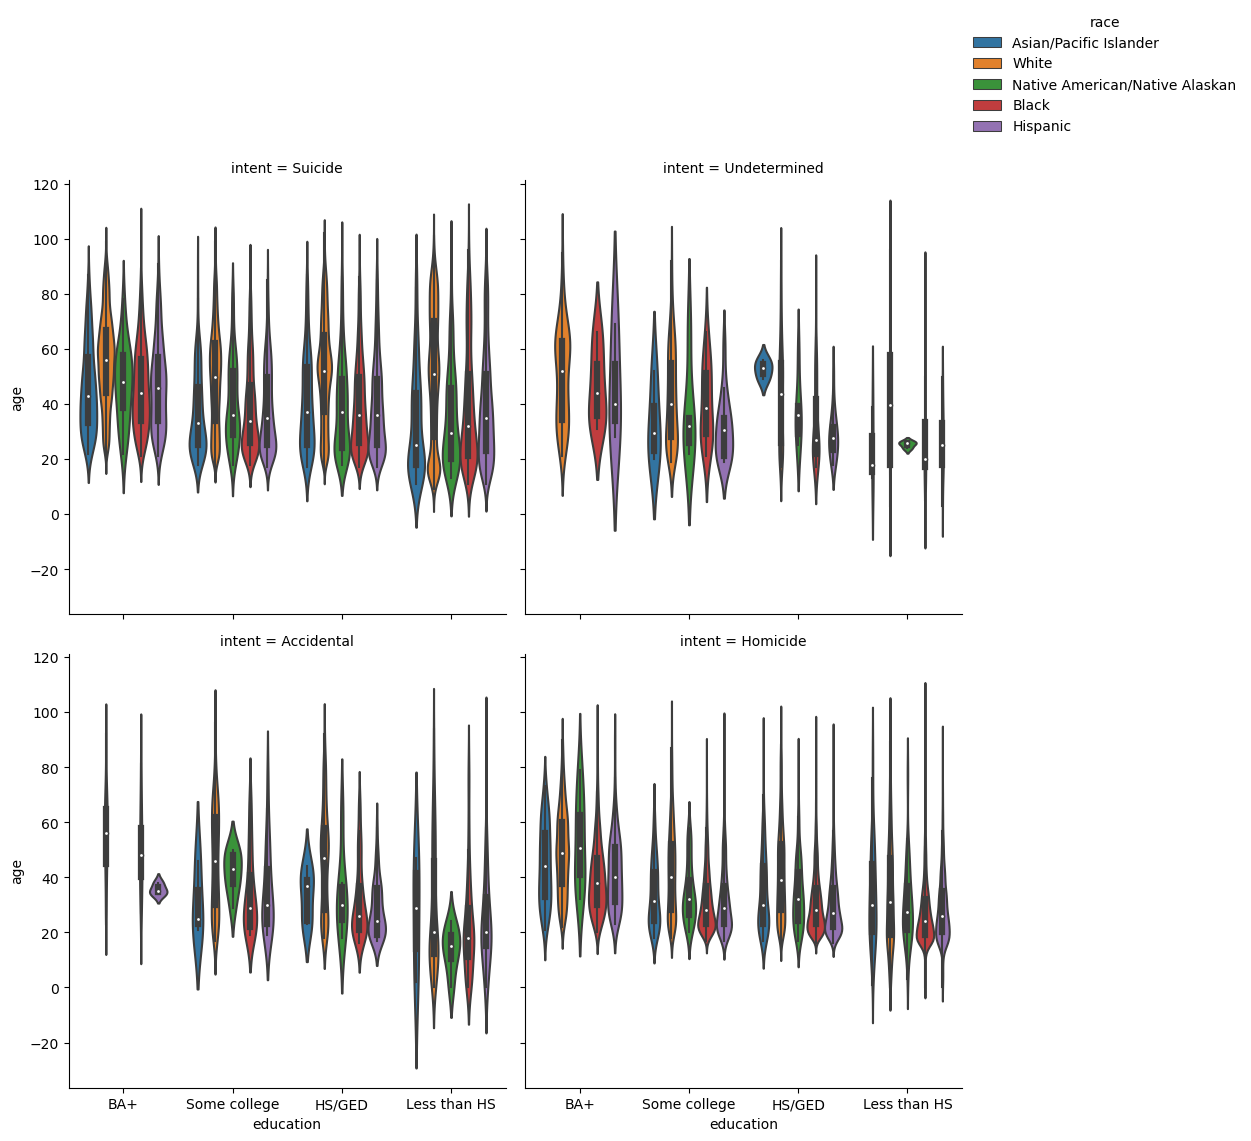

In [15]:
# Visualizing the relationship between education and gun deaths 
ax = pt1.sns.catplot(data=data_cleaned, x='education', y='age',hue='race',col='intent',kind='violin',col_wrap=2)
pt1.sns.move_legend(ax,"lower right", bbox_to_anchor=(1,1))

- **We can see from the above graphs that regardless of the intent of death, the people with less education than high school die at a younger age than the ones having a BA+ education.**
- **We can also observe that younger people with less education have more cases of accidental deaths while the more older and educated people die from suicide and homicide.**
- **We can also see that younger black people with less education have a higher chance of being involved in homicides than other race.**


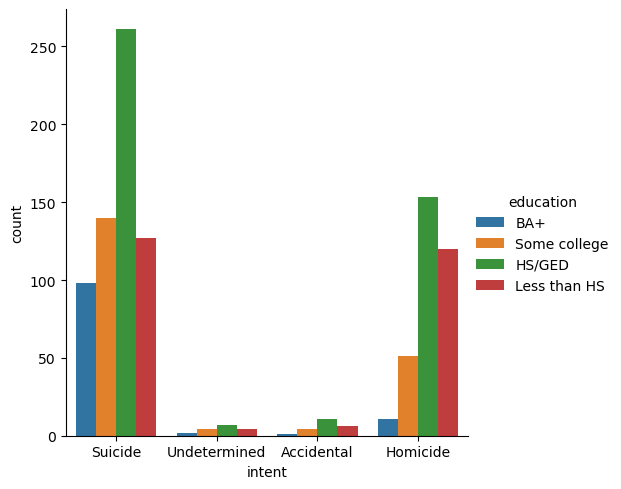

In [26]:
# Sub setting relevant columns from the main cleaned data set 
# Creating a new variable indicating the type of death
# Visualization the distribution of gun deaths by intent and education
(data_cleaned[['education', 'intent']]
 .iloc[:1000]
 .assign(death_type=lambda x: x['intent'].replace({
     'Accidental': 'Unintentional',
     'NA': 'other',
     'Undetermined': 'other'
 }).fillna('Homicide'))
 .pipe((pt1.sns.catplot, 'data'), x='intent', kind='count', hue='education')
)
None

- **In the above graph we have decreased the number of record taken into account to clearly see how high the rate of suicide and homicide is as compared Accidental or Undetermined deaths.**
- **We can also notice that people with education of BA+ have really low rates of deaths irrespective of the intent whereas people with Some college , HS or less than HS education have comparatively higher rates of deaths.**
- **In each intent type, people HS education have highest rates of deaths and then some college , less than HS and then BA+ respectively. But Homicide has a different trend where less than HS education people have second highest rates of deaths compared to the others.**

Next we will be looking at a barplot to try and answer "To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ?" .

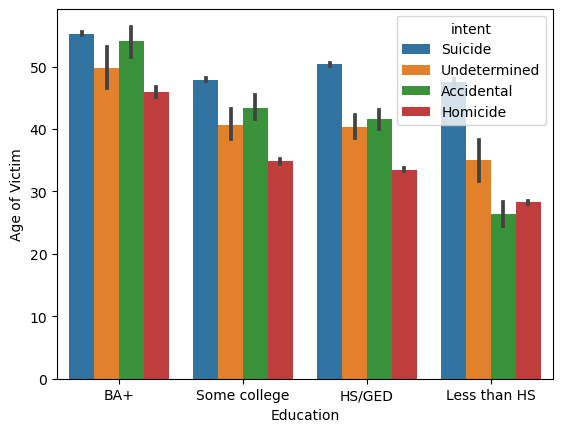

In [27]:
#Sub setting the data set again to work with variables that are relevant 
# Visualization
(data_cleaned[['age','race','sex','education','intent','place']]
.pipe((pt1.sns.barplot,'data'), x='education', y='age', hue='intent')
.set(xlabel='Education', ylabel='Age of Victim'))
None

### Analysis of Above Graph
- **The people with less than HS education have a higher chance of dying at an early age as compared to someone with a BA+ education.**
- **People with any kind of education are highly likely to commit suicide at an older age .**
- **Homicides generally involve people from a younger age group , with the youngest being those with less than HS education.**

We can start to see some kind of correlation between education and the deaths in US but let us check a few more things first.

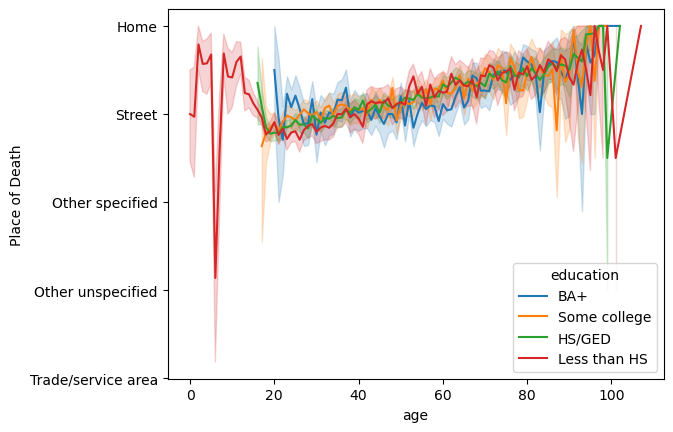

In [23]:
(data_cleaned
.pipe((pt1.sns.lineplot,'data'), x='age', y='place', hue='education')
.set(ylabel="Place of Death")
)
None

***In the above graph we compare the place of death with age for different types of education provided, lets see some observations.*** 

- Young people with less than HS education have rather high numbers of specified/unspecified deaths compared to some others with more education.
- People with BA+ have deaths spread out over the entire age range but are more likely to die at their own home or street rather than other unknown places.


C:\Users\OM\AppData\Local\Temp\ipykernel_5404\1504599130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relation = data_cleaned.corr()


<AxesSubplot:>

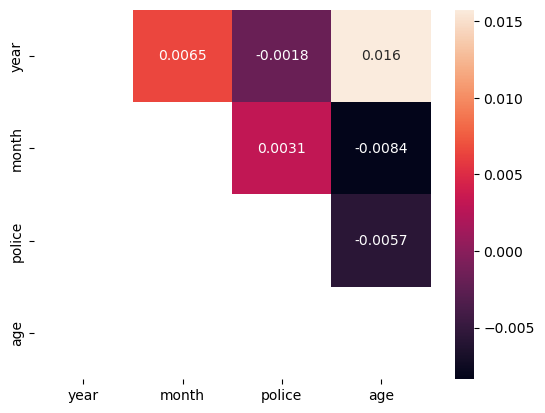

In [25]:
relation = data_cleaned.corr()
pt1.sns.heatmap(relation, xticklabels=relation.columns, yticklabels=relation.columns, annot=True,mask=pt1.np.tril(pt1.np.ones_like(relation)))

**Trying to see if any of the variables have any correlations using a heatmap**

In [ ]:
#Loading the processed data into a csv file
pt1.data_cleaned.to_csv('../data/processed/processed.csv', index=False)

# Observations from the above EDA
- The descriptive statistics shows that individuals with lower levels of education tend to have a higher rates of gun deaths.
- The violin plots show that the relationship between education and gun deaths varies by race and intent. For example, for intentional deaths, the median age of victims decreases as education level increases, and this trend is more pronounced for White individuals than for other racial groups.
- The count plot distribution shows that most deaths are intentional (suicide or homicide) .
- The bar plot also gives an idea that the age of the victim gets lower with the amount of education they receive. For example, someone with an education less than HS is more likely to face gun violence of some kind (highly intentional) at a younger age than someone with a higher education.

# Conclusions from the Analysis
- People with more education have a higher life expectancy (> 45 years) as compared to people with lesser education like less than HS or college degree.
- Suicide rates are the highest amongst HS graduates and is one of the most common causes of deaths for people with every kinds of education.
- People with more education generally BA+ or some college have a higher sense of knowledge regarding gun safety and thus lead to less risk of homicides and undetermined deaths.
- Using regression analysis to examine the contribution of education while keeping other factors constant, we found that higher educational attainment is associated with lower gun death rates. The correlation coefficient (-0.380) indicates that as educational attainment increases, the gun death rate decreases. Additionally, age, gender, race, religion, and gun ownership rates were found to be significant predictors of gun deaths in the United States. 
- After examining the intent column , we found that majority of gun deaths in the dataset were due to suicide (62.7%), followed by homicide (34.7%). The remaining deaths were either accidental (2.2%) or of unknown intent (0.4%). The analysis suggests that the relationship between educational attainment and gun deaths is primarily driven by the protective effects of education on suicide deaths.
- Our analysis showed that the protective effects of education are stronger for older individuals (above 65 years) than younger individuals (below 25 years). Additionally, the protective effects of education are stronger for White individuals compared to other racial groups.

***Overall, our analysis suggests that higher educational attainment is associated with lower gun death rates in the United States after controlling the geographical and contextual factors.***